# Stock Price Prediction with Three Algorithms

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


Using TensorFlow backend.


In [0]:


#read the file
df = pd.read_csv('/^GSPC.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


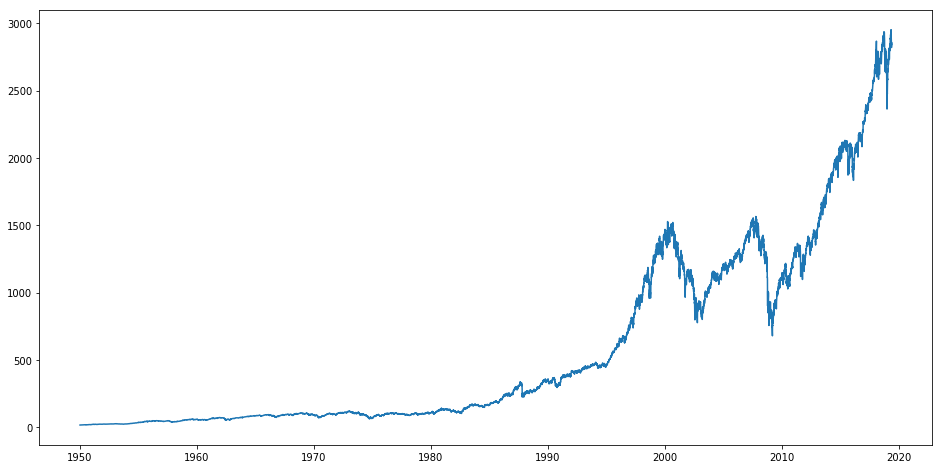

In [0]:


#plot
plt.figure(figsize=(16,8))
plt.plot(df['Open'], label='Open Price history')

# Linear Regression

In [0]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
#create features
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0
        
        
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])


# ARIMA

In [0]:
!pip install pyramid.arima

In [0]:
#the arima algortihm, doesnt work here

from pyramid.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [0]:

def lstm_function (number_days, filename, start, end)

#read the file
df = pd.read_csv('/^GSPC.csv')


#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

tr1 = int(len(dataset)*0.4)
tr2 = len(dataset)-int(len(dataset)*0.1)
train = dataset[tr1:tr2,:]
valid = dataset[tr2:,:]

#define date range
rg = 120

#25 is still good, do not go below

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(rg,len(train)):
    x_train.append(scaled_data[i-rg:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 10% of missing values, using past amount of rg from the train data
inputs = new_data[len(new_data) - len(valid) - rg:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(rg,inputs.shape[0]):
    X_test.append(inputs[i-rg:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

return;

# LSTM

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


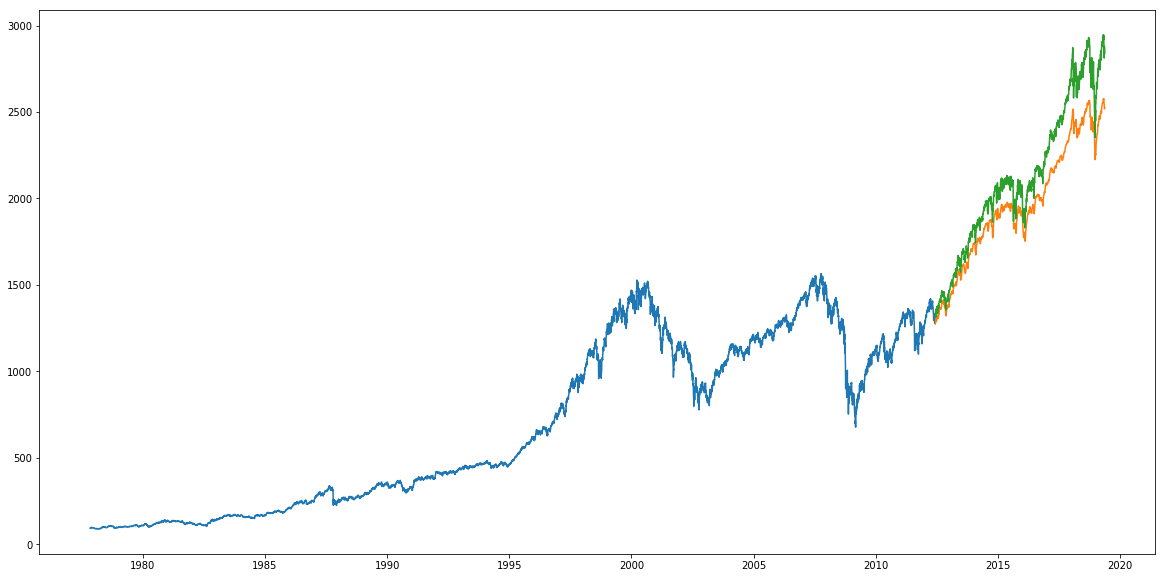

In [0]:
#for plotting
train = new_data[tr1:tr2]
valid = new_data[tr2:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Predictions','Close']])
#plt.plot(valid[[]])

In [0]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2))/(tr2-tr1))
rms

0.9602203287949475

In [0]:
valid[['Predictions','Close']] = lstm_function(30,'^GSPC.csv',0.1,0.1)

Epoch 1/1


In [9]:
    #read the file
    df = pd.read_csv('^GSPC.csv')
    start_per = 0.5
    end_per = 0.1

    #setting index as date
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df.index = df['Date']

    #creating dataframe
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]

    #setting index
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

    #creating train and test sets
    dataset = new_data.values

    tr1 = int(len(dataset)*start_per)
    tr2 = len(dataset)-int(len(dataset)*end_per)
    train = dataset[tr1:tr2,:]
    valid = dataset[tr2:,:]

#for plotting
    train = new_data[tr1:tr2]
    valid = new_data[tr2:]
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Predictions','Close']])
    
    
print(valid['Predictions']-valid['Close'])    

NameError: ignored

In [0]:

def lstm_function (number_days, filename, start_per, end_per):

    #read the file
    df = pd.read_csv(filename)


    #setting index as date
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df.index = df['Date']

    #creating dataframe
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]

    #setting index
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

    #creating train and test sets
    dataset = new_data.values

    tr1 = int(len(dataset)*start_per)
    tr2 = len(dataset)-int(len(dataset)*end_per)
    train = dataset[tr1:tr2,:]
    valid = dataset[tr2:,:]

    #define date range
    rg = number_days

    #25 is still good, do not go below

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    x_train, y_train = [], []
    for i in range(rg,len(train)):
        x_train.append(scaled_data[i-rg:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

    #predicting 10% of missing values, using past amount of rg from the train data
    inputs = new_data[len(new_data) - len(valid) - rg:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(rg,inputs.shape[0]):
        X_test.append(inputs[i-rg:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    #for plotting
    train = new_data[tr1:tr2]
    valid = new_data[tr2:]
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Predictions','Close']])
    #plt.plot(valid[[]])
    
    
    print( np.sqrt(np.mean(np.power( (valid-closing_price) ,2) )/(tr2-tr1)) )
    #print(valid['Predictions']-valid['Close']) 
    
    return valid[['Predictions','Close']];

In [0]:

def lstm_function_alter (number_days, filename, start_per, end_per):

    #read the file
    df = pd.read_csv(filename)


    #setting index as date
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df.index = df['Date']

    #creating dataframe
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]

    #setting index
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

    #creating train and test sets
    dataset = new_data.values

    tr1 = int(len(dataset)*start_per)
    tr2 = len(dataset)-int(len(dataset)*end_per)
    train = dataset[tr1:tr2,:]
    valid = dataset[tr2:,:]

    #define date range
    rg = number_days
    de = 0
    dee = 0
    deee = 0
    #25 is still good, do not go below

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    x_train, y_train = [], []
    for i in range(rg,len(train)-dee):
        x_train.append(scaled_data[i-rg:i-de,0])
        y_train.append(scaled_data[i+de,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    #model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    model.fit(x_train[:len(train)-deee] , y_train[:len(train)-deee], epochs=1, batch_size=1, verbose=2)

    #predicting 10% of missing values, using past amount of rg from the train data
    #input are the TEST DATA, NOT THE TRAINING DATA
    #inputs = new_data[rg:len(valid)].values
    inputs = new_data[len(new_data) - len(valid) - rg:len(new_data)].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(rg,inputs.shape[0]):
        X_test.append(inputs[i-rg:i-de,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    #closing_price = model.predict(x_train)
    closing_price = scaler.inverse_transform(closing_price)
    
    #for plotting
    train = new_data[tr1:tr2]
    valid = new_data[tr2:]
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Predictions','Close']])
    #plt.plot(valid[[]])
    
    
    print( np.sqrt(np.mean(np.power( (valid-closing_price) ,2) )/(tr2-tr1)) )
          
    
    return;